# Logarithmic Transformations in Image Processing

## Theory

Logarithmic transformations are **non-linear** point processing operations that follow the general form:

$$s = c \cdot \log(1 + r)$$

Where:
- $r$ = input pixel intensity (0-255)
- $s$ = output pixel intensity
- $c$ = scaling constant to map output to [0, 255]
- $\log$ = natural logarithm (ln) or log base 10

The constant $c$ is typically calculated as:

$$c = \frac{255}{\log(1 + r_{max})}$$

where $r_{max} = 255$ for 8-bit images.

### Key Characteristics

1. **Non-linear** - Output is not proportional to input
2. **Expands dark values** - Small changes in dark pixels produce larger changes in output
3. **Compresses bright values** - Large changes in bright pixels produce smaller changes in output
4. **Dynamic range compression** - Brings out details in dark regions

### Why Use Log Transformations?

- **Enhance dark regions**: Makes details in shadows visible
- **Display wide dynamic range**: Compress high dynamic range to displayable range
- **Fourier spectrum visualization**: Frequency domain data often has enormous range
- **Medical imaging**: Enhance low-intensity structures
- **Astronomy**: Reveal faint stars and nebulae details

## Example 1: Basic Log Transformation

Applying log transformation to a simple array to understand its effect on different intensity values.

Original Image:
[[ 10  20  50 100]
 [ 15  30  80 150]
 [ 20  40 120 200]
 [ 25  60 160 240]]
Range: 10 - 240

Log Transformed Image (c = 45.99):
[[110 140 180 212]
 [127 157 202 230]
 [140 170 220 243]
 [149 188 233 252]]
Range: 110 - 252

Intensity Changes:
Original → Transformed → Change
 10 →  110.3 → +100.3
 20 →  140.0 → +120.0
 50 →  180.8 → +130.8
100 →  212.2 → +112.2
150 →  230.7 →  +80.7
200 →  243.9 →  +43.9
240 →  252.2 →  +12.2


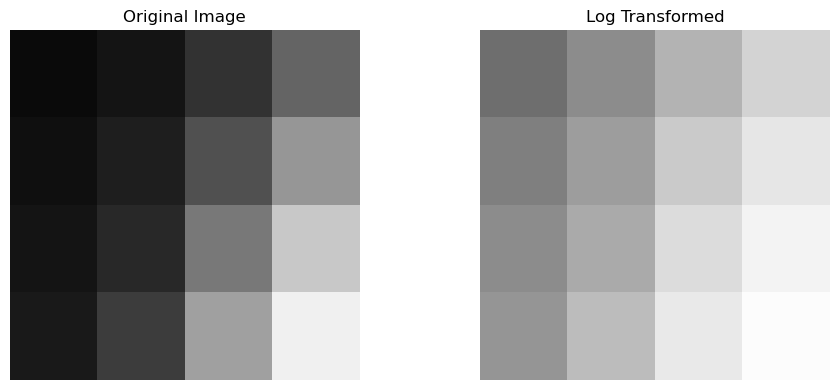

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample image with wide range of intensities
sample_image = np.array([
    [10, 20, 50, 100],
    [15, 30, 80, 150],
    [20, 40, 120, 200],
    [25, 60, 160, 240]
], dtype=np.uint8)

print("Original Image:")
print(sample_image)
print(f"Range: {sample_image.min()} - {sample_image.max()}")

# Calculate scaling constant c
c = 255 / np.log(1 + 255)

# Apply log transformation: s = c * log(1 + r)
log_transformed = c * np.log(1 + sample_image)
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

print(f"\nLog Transformed Image (c = {c:.2f}):")
print(log_transformed)
print(f"Range: {log_transformed.min()} - {log_transformed.max()}")

# Show the difference
print("\nIntensity Changes:")
print("Original → Transformed → Change")
for orig, trans in zip([10, 20, 50, 100, 150, 200, 240], 
                        [c*np.log(1+v) for v in [10, 20, 50, 100, 150, 200, 240]]):
    change = trans - orig
    print(f"{orig:3d} → {trans:6.1f} → {change:+6.1f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(sample_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(log_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Log Transformed')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Example 2: Transformation Curve Comparison

Comparing log transformation with linear transformation to see the non-linear behavior.

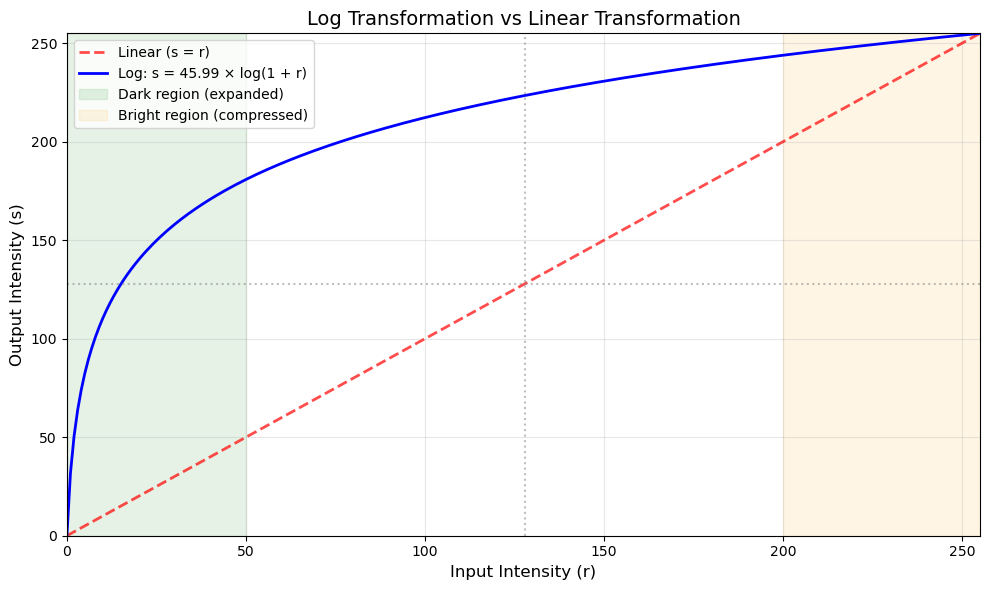

Rate of change (approximate slope) at different intensities:
Intensity | Log Transform | Linear Transform
--------------------------------------------------
 10       |  4.001        |  1.000
 50       |  0.893        |  1.000
100       |  0.453        |  1.000
150       |  0.304        |  1.000
200       |  0.228        |  1.000
250       |  0.183        |  1.000

Key Observation: Log transform has higher slope in dark regions,
                 lower slope in bright regions (non-linear!)


In [2]:
# Create intensity range
r_values = np.arange(0, 256)

# Calculate different transformations
c = 255 / np.log(1 + 255)
s_log = c * np.log(1 + r_values)
s_linear = r_values  # Identity transformation

plt.figure(figsize=(10, 6))

# Plot transformations
plt.plot(r_values, s_linear, 'r--', linewidth=2, label='Linear (s = r)', alpha=0.7)
plt.plot(r_values, s_log, 'b-', linewidth=2, label=f'Log: s = {c:.2f} × log(1 + r)')

# Add reference lines
plt.axhline(y=128, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=128, color='gray', linestyle=':', alpha=0.5)

# Highlight regions
plt.fill_between([0, 50], 0, 255, alpha=0.1, color='green', label='Dark region (expanded)')
plt.fill_between([200, 255], 0, 255, alpha=0.1, color='orange', label='Bright region (compressed)')

plt.xlabel('Input Intensity (r)', fontsize=12)
plt.ylabel('Output Intensity (s)', fontsize=12)
plt.title('Log Transformation vs Linear Transformation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()

# Show slopes (derivatives) at different points
print("Rate of change (approximate slope) at different intensities:")
print("Intensity | Log Transform | Linear Transform")
print("-" * 50)
for r in [10, 50, 100, 150, 200, 250]:
    # Approximate derivative using finite difference
    dr = 1
    slope_log = (c * np.log(1 + r + dr) - c * np.log(1 + r)) / dr
    slope_linear = 1.0
    print(f"{r:3d}       | {slope_log:6.3f}        | {slope_linear:6.3f}")

print("\nKey Observation: Log transform has higher slope in dark regions,")
print("                 lower slope in bright regions (non-linear!)")

## Example 3: Enhancing Dark Images

Practical application: Bringing out details in underexposed (dark) images.

Dark Image Range: 10 - 89
Log Enhanced Range: 110 - 206
Linear Enhanced Range: 110 - 189


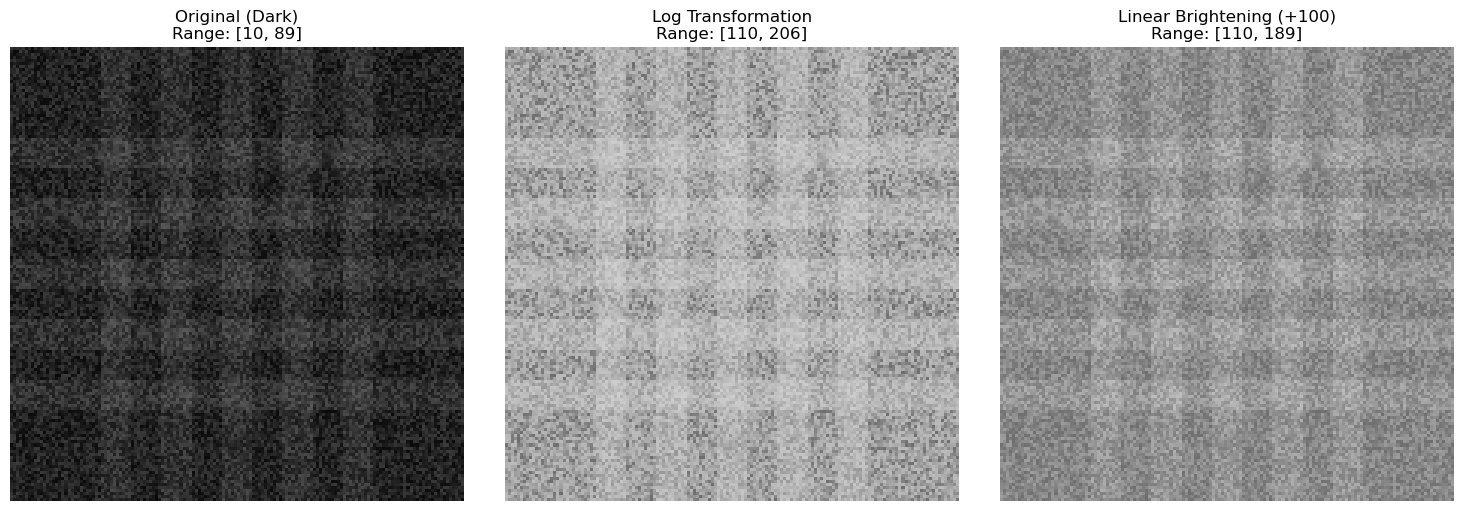


Notice: Log transformation reveals subtle details better than linear brightening!


In [3]:
# Create a dark image with subtle details
np.random.seed(42)
dark_image = np.random.randint(10, 60, (150, 150), dtype=np.uint8)

# Add some structure (barely visible in original)
for i in range(30, 120, 20):
    dark_image[i:i+10, :] = np.clip(dark_image[i:i+10, :] + 15, 0, 255)
    dark_image[:, i:i+10] = np.clip(dark_image[:, i:i+10] + 15, 0, 255)

print(f"Dark Image Range: {dark_image.min()} - {dark_image.max()}")

# Apply log transformation
c = 255 / np.log(1 + 255)
log_enhanced = c * np.log(1 + dark_image)
log_enhanced = np.clip(log_enhanced, 0, 255).astype(np.uint8)

# Compare with linear brightness adjustment
linear_enhanced = np.clip(dark_image + 100, 0, 255).astype(np.uint8)

print(f"Log Enhanced Range: {log_enhanced.min()} - {log_enhanced.max()}")
print(f"Linear Enhanced Range: {linear_enhanced.min()} - {linear_enhanced.max()}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(dark_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Original (Dark)\nRange: [{dark_image.min()}, {dark_image.max()}]')
axes[0].axis('off')

axes[1].imshow(log_enhanced, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Log Transformation\nRange: [{log_enhanced.min()}, {log_enhanced.max()}]')
axes[1].axis('off')

axes[2].imshow(linear_enhanced, cmap='gray', vmin=0, vmax=255)
axes[2].set_title(f'Linear Brightening (+100)\nRange: [{linear_enhanced.min()}, {linear_enhanced.max()}]')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nNotice: Log transformation reveals subtle details better than linear brightening!")

## Example 4: Wide Dynamic Range Compression

Simulating a scenario with extremely wide dynamic range (like Fourier spectrum or astronomical images).

Original data range: 3.92 - 10032.15
Dynamic range ratio: 2039.9:1

Direct scaling: Most values compressed to narrow range
Log scaling: Details preserved across entire range


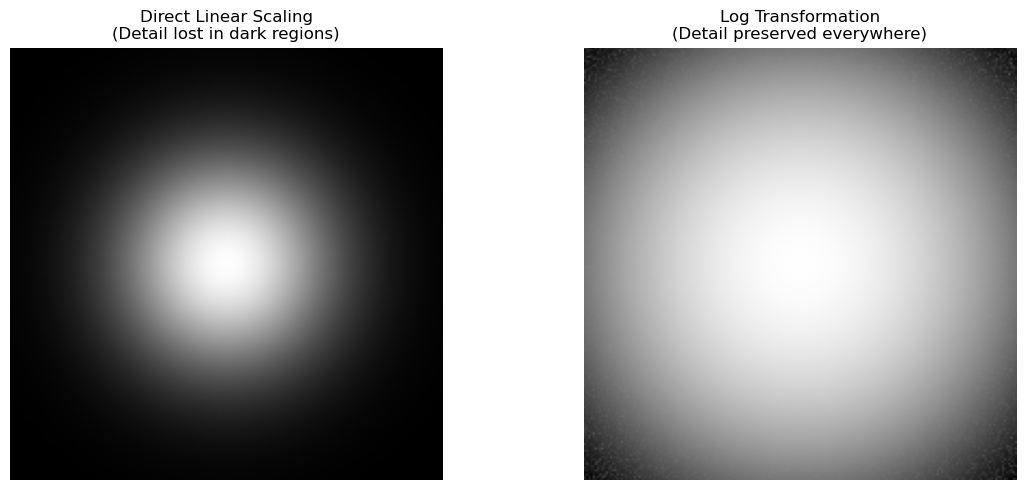

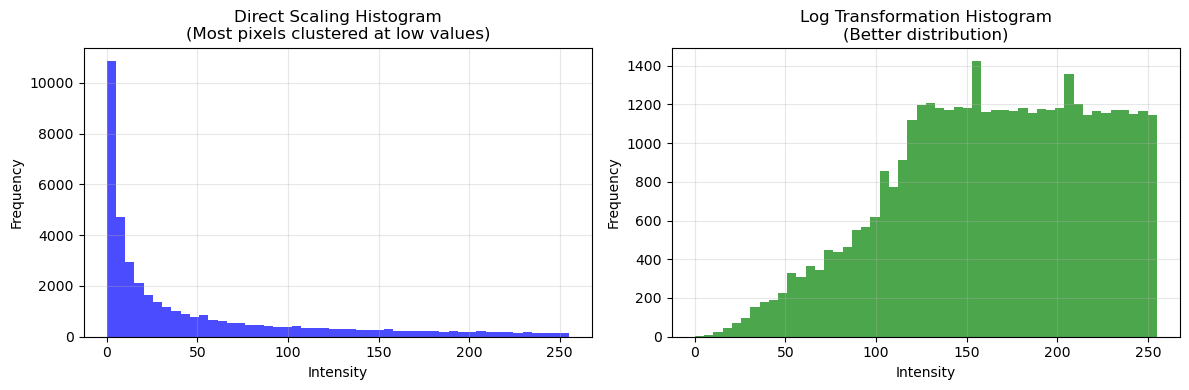

In [4]:
# Create synthetic image with extreme dynamic range
# Simulating something like a Fourier spectrum or star field
height, width = 200, 200
x = np.linspace(-2, 2, width)
y = np.linspace(-2, 2, height)
X, Y = np.meshgrid(x, y)

# Create bright spots on dark background (extreme range)
R = np.sqrt(X**2 + Y**2)
wide_range_image = np.exp(-R**2) * 10000  # Values range from ~0 to 10000

# Add some noise
wide_range_image += np.random.exponential(5, (height, width))

print(f"Original data range: {wide_range_image.min():.2f} - {wide_range_image.max():.2f}")
print(f"Dynamic range ratio: {wide_range_image.max() / (wide_range_image.min() + 1):.1f}:1")

# Method 1: Direct scaling to [0, 255] - loses detail
direct_scale = ((wide_range_image - wide_range_image.min()) / 
                (wide_range_image.max() - wide_range_image.min()) * 255).astype(np.uint8)

# Method 2: Log transformation - preserves detail
# Apply log to compress, then scale
log_compressed = np.log(1 + wide_range_image)
log_scaled = ((log_compressed - log_compressed.min()) / 
              (log_compressed.max() - log_compressed.min()) * 255).astype(np.uint8)

print(f"\nDirect scaling: Most values compressed to narrow range")
print(f"Log scaling: Details preserved across entire range")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(direct_scale, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Direct Linear Scaling\n(Detail lost in dark regions)')
axes[0].axis('off')

axes[1].imshow(log_scaled, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Log Transformation\n(Detail preserved everywhere)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Compare histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(direct_scale.ravel(), bins=50, color='blue', alpha=0.7)
axes[0].set_title('Direct Scaling Histogram\n(Most pixels clustered at low values)')
axes[0].set_xlabel('Intensity')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(log_scaled.ravel(), bins=50, color='green', alpha=0.7)
axes[1].set_title('Log Transformation Histogram\n(Better distribution)')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Example 5: Different Logarithm Bases

Comparing natural log (ln), log base 10, and log base 2.

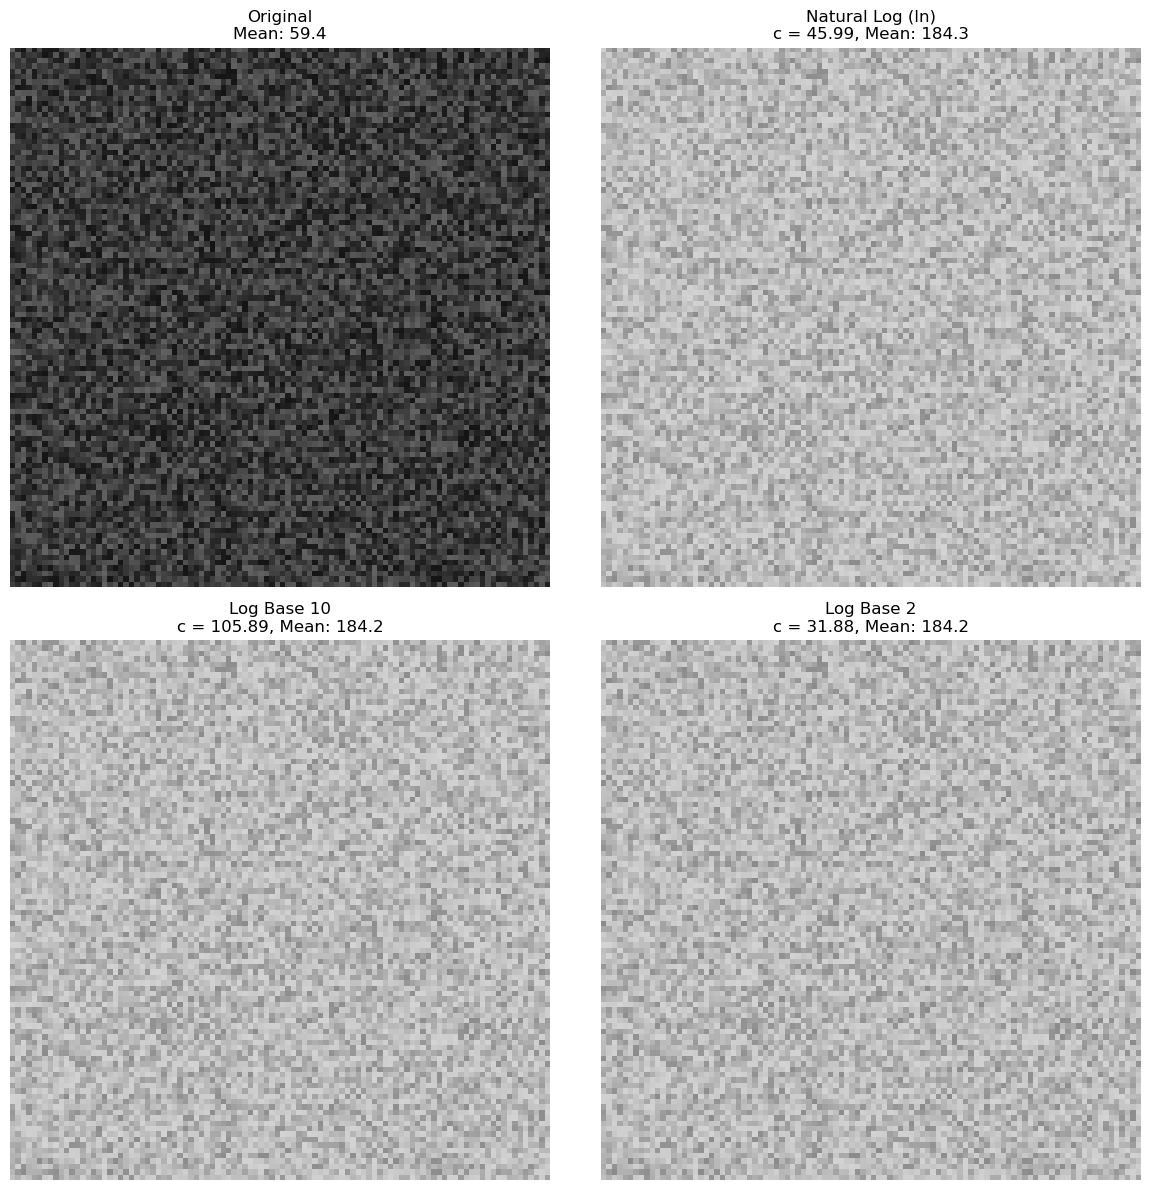

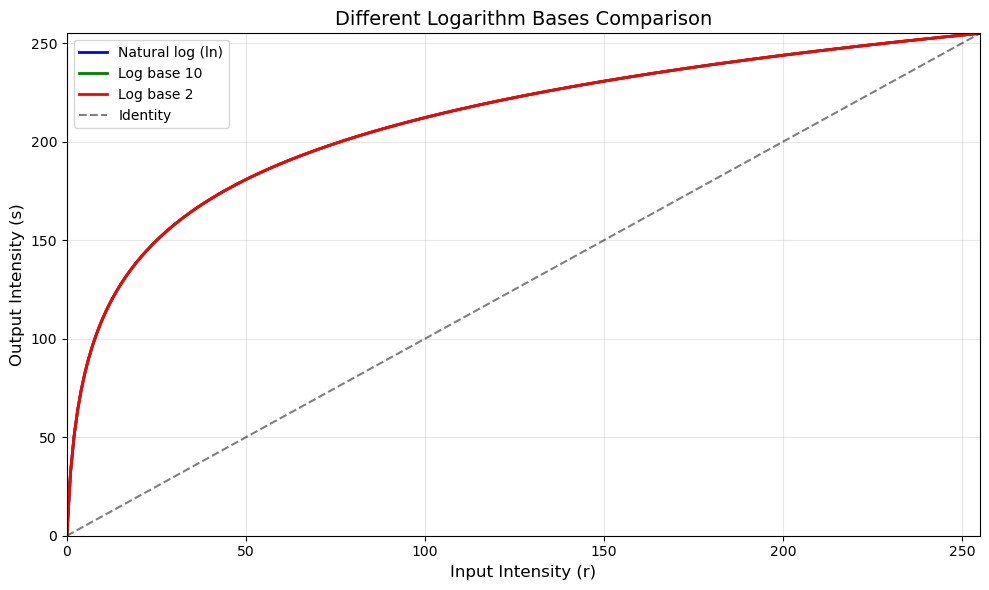

Note: All bases produce similar curves when properly scaled.
      Natural log (ln) is most commonly used in image processing.


In [5]:
# Create test image
test_image = np.random.randint(20, 100, (100, 100), dtype=np.uint8)

# Apply different log bases
# Natural log (base e)
c_ln = 255 / np.log(1 + 255)
log_ln = c_ln * np.log(1 + test_image)
log_ln = np.clip(log_ln, 0, 255).astype(np.uint8)

# Log base 10
c_log10 = 255 / np.log10(1 + 255)
log_10 = c_log10 * np.log10(1 + test_image)
log_10 = np.clip(log_10, 0, 255).astype(np.uint8)

# Log base 2
c_log2 = 255 / np.log2(1 + 255)
log_2 = c_log2 * np.log2(1 + test_image)
log_2 = np.clip(log_2, 0, 255).astype(np.uint8)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(test_image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title(f'Original\nMean: {test_image.mean():.1f}')
axes[0, 0].axis('off')

axes[0, 1].imshow(log_ln, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f'Natural Log (ln)\nc = {c_ln:.2f}, Mean: {log_ln.mean():.1f}')
axes[0, 1].axis('off')

axes[1, 0].imshow(log_10, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title(f'Log Base 10\nc = {c_log10:.2f}, Mean: {log_10.mean():.1f}')
axes[1, 0].axis('off')

axes[1, 1].imshow(log_2, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title(f'Log Base 2\nc = {c_log2:.2f}, Mean: {log_2.mean():.1f}')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Plot transformation curves
r_vals = np.arange(0, 256)
s_ln = c_ln * np.log(1 + r_vals)
s_log10 = c_log10 * np.log10(1 + r_vals)
s_log2 = c_log2 * np.log2(1 + r_vals)

plt.figure(figsize=(10, 6))
plt.plot(r_vals, s_ln, 'b-', linewidth=2, label='Natural log (ln)')
plt.plot(r_vals, s_log10, 'g-', linewidth=2, label='Log base 10')
plt.plot(r_vals, s_log2, 'r-', linewidth=2, label='Log base 2')
plt.plot(r_vals, r_vals, 'k--', alpha=0.5, label='Identity')

plt.xlabel('Input Intensity (r)', fontsize=12)
plt.ylabel('Output Intensity (s)', fontsize=12)
plt.title('Different Logarithm Bases Comparison', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()

print("Note: All bases produce similar curves when properly scaled.")
print("      Natural log (ln) is most commonly used in image processing.")

## Example 6: Complete Histogram Analysis

Understanding how log transformation redistributes pixel intensities.

C:\Users\sanat\AppData\Local\Temp\ipykernel_185564\4119305513.py:8: RuntimeWarning: divide by zero encountered in log
  log_result = c * np.log(1 + skewed_image)


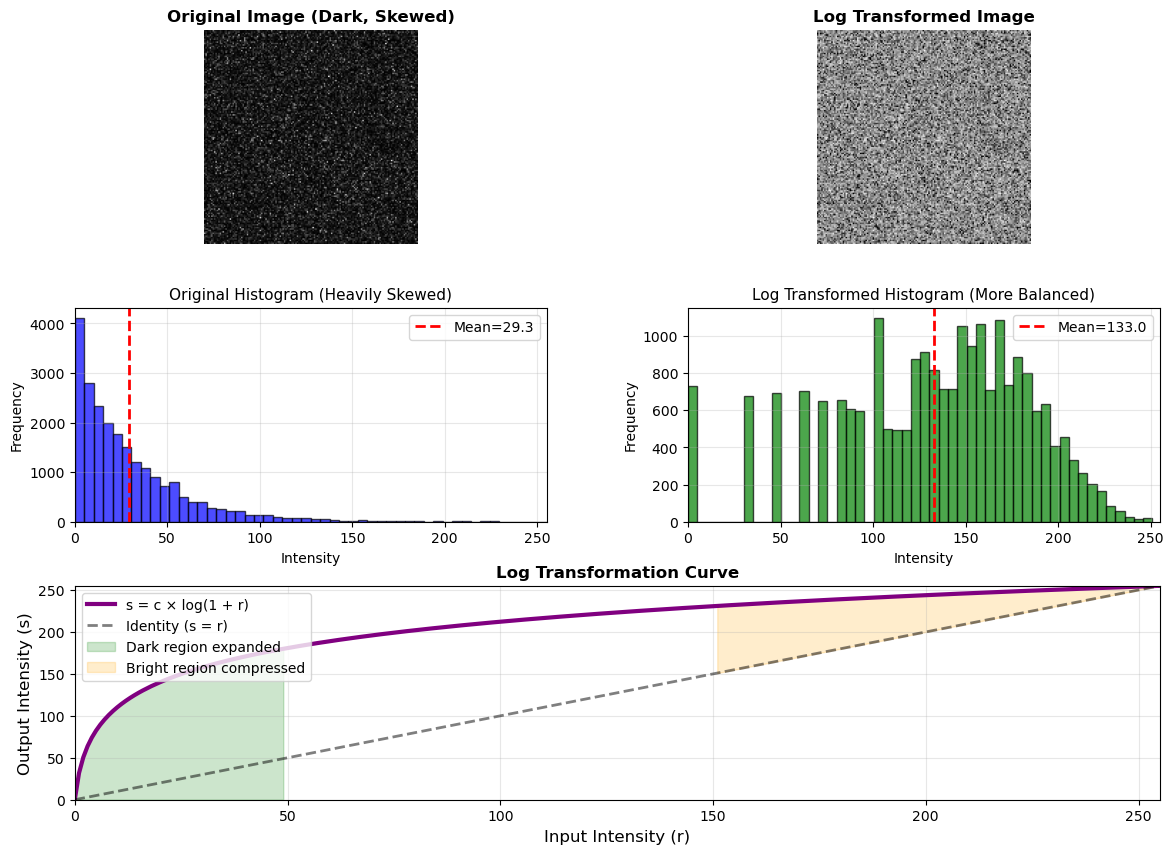

Statistical Analysis:
Metric                      Original   Log Transform
------------------------------------------------------------
Mean                           29.30          132.99
Std Deviation                  29.41           51.94
Min                                0               0
Max                              255             251
Median                         21.00          142.00

Key Observations:
- Mean shifted toward middle of range (better contrast)
- Standard deviation changed (distribution spread)
- Dark pixels expanded to fill more of the histogram
- Overall more balanced intensity distribution


In [6]:
# Create image with skewed distribution (mostly dark pixels)
np.random.seed(123)
skewed_image = np.random.exponential(30, (150, 150))
skewed_image = np.clip(skewed_image, 0, 255).astype(np.uint8)

# Apply log transformation
c = 255 / np.log(1 + 255)
log_result = c * np.log(1 + skewed_image)
log_result = np.clip(log_result, 0, 255).astype(np.uint8)

# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(skewed_image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image (Dark, Skewed)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Log transformed image
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(log_result, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Log Transformed Image', fontsize=12, fontweight='bold')
ax2.axis('off')

# Original histogram
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(skewed_image.ravel(), bins=50, color='blue', alpha=0.7, edgecolor='black')
ax3.set_title('Original Histogram (Heavily Skewed)', fontsize=11)
ax3.set_xlabel('Intensity')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0, 255)
ax3.grid(True, alpha=0.3)
ax3.axvline(skewed_image.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean={skewed_image.mean():.1f}')
ax3.legend()

# Log transformed histogram
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(log_result.ravel(), bins=50, color='green', alpha=0.7, edgecolor='black')
ax4.set_title('Log Transformed Histogram (More Balanced)', fontsize=11)
ax4.set_xlabel('Intensity')
ax4.set_ylabel('Frequency')
ax4.set_xlim(0, 255)
ax4.grid(True, alpha=0.3)
ax4.axvline(log_result.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean={log_result.mean():.1f}')
ax4.legend()

# Transformation curve
ax5 = fig.add_subplot(gs[2, :])
r_range = np.arange(0, 256)
s_range = c * np.log(1 + r_range)
ax5.plot(r_range, s_range, 'purple', linewidth=3, label='s = c × log(1 + r)')
ax5.plot(r_range, r_range, 'k--', alpha=0.5, linewidth=2, label='Identity (s = r)')
ax5.fill_between(r_range, 0, s_range, where=(r_range < 50), alpha=0.2, color='green', label='Dark region expanded')
ax5.fill_between(r_range, s_range, r_range, where=(r_range > 150), alpha=0.2, color='orange', label='Bright region compressed')
ax5.set_xlabel('Input Intensity (r)', fontsize=12)
ax5.set_ylabel('Output Intensity (s)', fontsize=12)
ax5.set_title('Log Transformation Curve', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend(loc='upper left')
ax5.set_xlim(0, 255)
ax5.set_ylim(0, 255)

plt.show()

# Statistical comparison
print("Statistical Analysis:")
print("=" * 60)
print(f"{'Metric':<20} {'Original':>15} {'Log Transform':>15}")
print("-" * 60)
print(f"{'Mean':<20} {skewed_image.mean():>15.2f} {log_result.mean():>15.2f}")
print(f"{'Std Deviation':<20} {skewed_image.std():>15.2f} {log_result.std():>15.2f}")
print(f"{'Min':<20} {skewed_image.min():>15} {log_result.min():>15}")
print(f"{'Max':<20} {skewed_image.max():>15} {log_result.max():>15}")
print(f"{'Median':<20} {np.median(skewed_image):>15.2f} {np.median(log_result):>15.2f}")
print("=" * 60)
print("\nKey Observations:")
print("- Mean shifted toward middle of range (better contrast)")
print("- Standard deviation changed (distribution spread)")
print("- Dark pixels expanded to fill more of the histogram")
print("- Overall more balanced intensity distribution")

## Summary

### Key Characteristics of Log Transformations

**Formula:** $s = c \cdot \log(1 + r)$ where $c = \frac{255}{\log(1 + 255)}$

**Properties:**
1. **Non-linear**: Output not proportional to input
2. **Expands dark intensities**: Small changes in dark pixels → larger output changes
3. **Compresses bright intensities**: Large changes in bright pixels → smaller output changes
4. **Dynamic range compression**: Maps wide input range to displayable output range

### When to Use Log Transformations

**Best Applications:**
- Dark or underexposed images
- Wide dynamic range data (Fourier spectra, astronomical images)
- Medical imaging (X-rays, CT scans)
- Images where detail in shadows is important
- Scientific visualization

**Advantages:**
- Reveals details in dark regions
- Handles extreme dynamic ranges
- Mathematically well-defined
- Predictable behavior

**Limitations:**
- May wash out bright regions
- Not suitable for already well-exposed images
- Can introduce noise amplification in very dark regions
- No parameter to control the degree of transformation (fixed curve shape)

### Comparison with Linear Transformations

| Aspect | Linear (s = ar + b) | Logarithmic (s = c log(1+r)) |
|--------|---------------------|------------------------------|
| Type | Linear | Non-linear |
| Flexibility | High (adjust a, b) | Low (only scaling) |
| Dark regions | Proportional change | Expanded |
| Bright regions | Proportional change | Compressed |
| Best for | General enhancement | Wide dynamic range |
| Reversible | Yes (if no clipping) | Yes |

### Practical Tips

1. **Always use log(1 + r)** not log(r) to avoid log(0) = undefined
2. **Scale properly** using c = 255/log(256) for 8-bit images
3. **Consider alternatives** like gamma correction for more control
4. **Check histograms** before and after to verify improvement
5. **Combine with other techniques** for optimal results